# Notebook for Testing and Running a Fast Example

In [1]:
%matplotlib inline
import os

## Generation Test

Run the following cells. If the code runs successfully, initial_test.hdf5 file will be added to the current directory. It will be an SNR gridded dataset with total mass as the x-value and redshift as the y value. It will use the Classic LISA and Proposed LISA curves for the SNR calculation and the Hils-Bender estimation (Bender & Hils 1997) by Hiscock et al. 2000 for the white dwarf noise (provided in GitHub). This will verify the generation code and, especially, pyphenomd.py runs correctly. 

In [2]:
from generate_contour_data import generate_contour_data

/Users/michaelkatz/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
testing_generate_dict = {

"general":
    {
    "WORKING_DIRECTORY": ".",
    "signal_type": ["all", "ins", "mrg", "rd"],
    "generation_type": "parallel",
    "num_processors": 4,
    "num_splits":1000,
    "add_wd_noise": "both"
    },

"output_info":
    {
    "output_folder": ".",
    "output_file_name":"initial_test",
    "output_file_type":"hdf5",
    "x_col_name": "M_s",
    "y_col_name": "z",
    "added_note": "This is the initial test set."
    },


"input_info":
    {
    "freq_column_label": "f",
    "amplitude_column_label": "ASD", 
    "sensitivity_curves": 
        [
        {"name":"PL.txt", "type":"ASD"}, 
        {"name":"CL.txt", "type":"ASD"} 
        ],
    "sensitivity_averaging_factor":0.3872983346,
    "input_location":"noise_curves",
    "galactic_background": 
        {"name":"WDnoise.txt", "type":"ASD"}
    },

"generate_info":
    {
    "xscale": "log",
    "num_x": 200,
    "x_low": 1e2,
    "x_high": 1e10,
    "xval_name": "total_mass",
    "xval_unit": "SolarMasses",

    "yscale": "log",
    "num_y": 200,
    "y_low": 1e-2,
    "y_high": 1e2,
    "yval_name": "redshift",
    "yval_unit": "None",

    "fixed_parameter_1": 0.2,
    "par_1_name": "mass_ratio",
    "par_1_unit": "None",

    "fixed_parameter_2": 0.65,
    "par_2_name": "spin_1",
    "par_2_unit": "None",
        
    "fixed_parameter_3": 1.0,
    "par_3_name": "start_time",
    "par_3_unit": "Years",

    "fixed_parameter_4": 0.0,
    "par_4_name": "end_time",
    "par_4_unit": "Years",

    "fixed_parameter_5": 0.65,
    "par_5_name": "spin_2",
    "par_5_unit": "None",

    "snr_calculation_factors":
        {
        "averaging_factor": 0.692820323,
        "snr_factor": 1.4142135624
        }
    }
}

generate_contour_data(testing_generate_dict)

start pool num process: 40 

outputing file
130.42188000679016


## Make Plot Test

Run the following cells to test each plot from make plot. It will produce a Waterfall, Ratio, and Horizon plot. 

In [4]:
from make_plot import plot_main

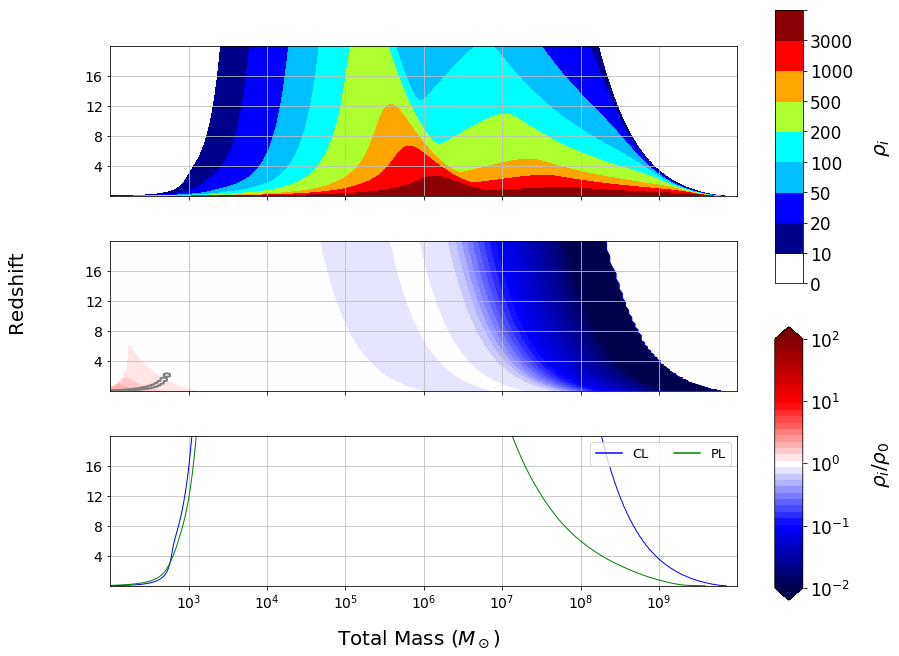

In [5]:
testing_plotting_dict = {
"general":{
    "WORKING_DIRECTORY": ".",

    "SNR_CUT": 5.0,

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 10.0,

    "num_rows": 3,
    "num_cols": 1,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",

    "fig_y_label": "Redshift",
    "fig_x_label": r"Total Mass ($M_\odot$)",
    "file_name": "initial_test.hdf5"
        
    },



"plot_info":
    {

    "0":{
        "file":[
            {"label":"CL_wd_all"}
            ],
        "type": "Waterfall"
        },
    "1":{
        "file":[
            {"label":"PL_wd_all"}
            ],
        "control":
            {"name": "initial_test.hdf5", "label":"CL_wd_all"},
        "type": "Ratio"
        },
        
    "2":{
        "file":[
            {"label":"CL_wd_all"}, 
            {"label":"PL_wd_all"}
            ],
        "type": "Horizon",
        "legend":
            {
            "labels": ["CL", "PL"],
            "loc": "upper right",
            "size":13,
            "ncol": 2
            },
        }
    }
}

plot_main(testing_plotting_dict)